Saving bird.jpg to bird.jpg
Segmentation completed in 0.01 seconds.
Feature map generation progress: 4.76% [1/21]
Feature map generation progress: 9.52% [2/21]
Feature map generation progress: 14.29% [3/21]
Feature map generation progress: 19.05% [4/21]
Feature map generation progress: 23.81% [5/21]
Feature map generation progress: 28.57% [6/21]
Feature map generation progress: 33.33% [7/21]
Feature map generation progress: 38.10% [8/21]
Feature map generation progress: 42.86% [9/21]
Feature map generation progress: 47.62% [10/21]
Feature map generation progress: 52.38% [11/21]
Feature map generation progress: 57.14% [12/21]
Feature map generation progress: 61.90% [13/21]
Feature map generation progress: 66.67% [14/21]
Feature map generation progress: 71.43% [15/21]
Feature map generation progress: 76.19% [16/21]
Feature map generation progress: 80.95% [17/21]
Feature map generation progress: 85.71% [18/21]
Feature map generation progress: 90.48% [19/21]
Feature map generation progress

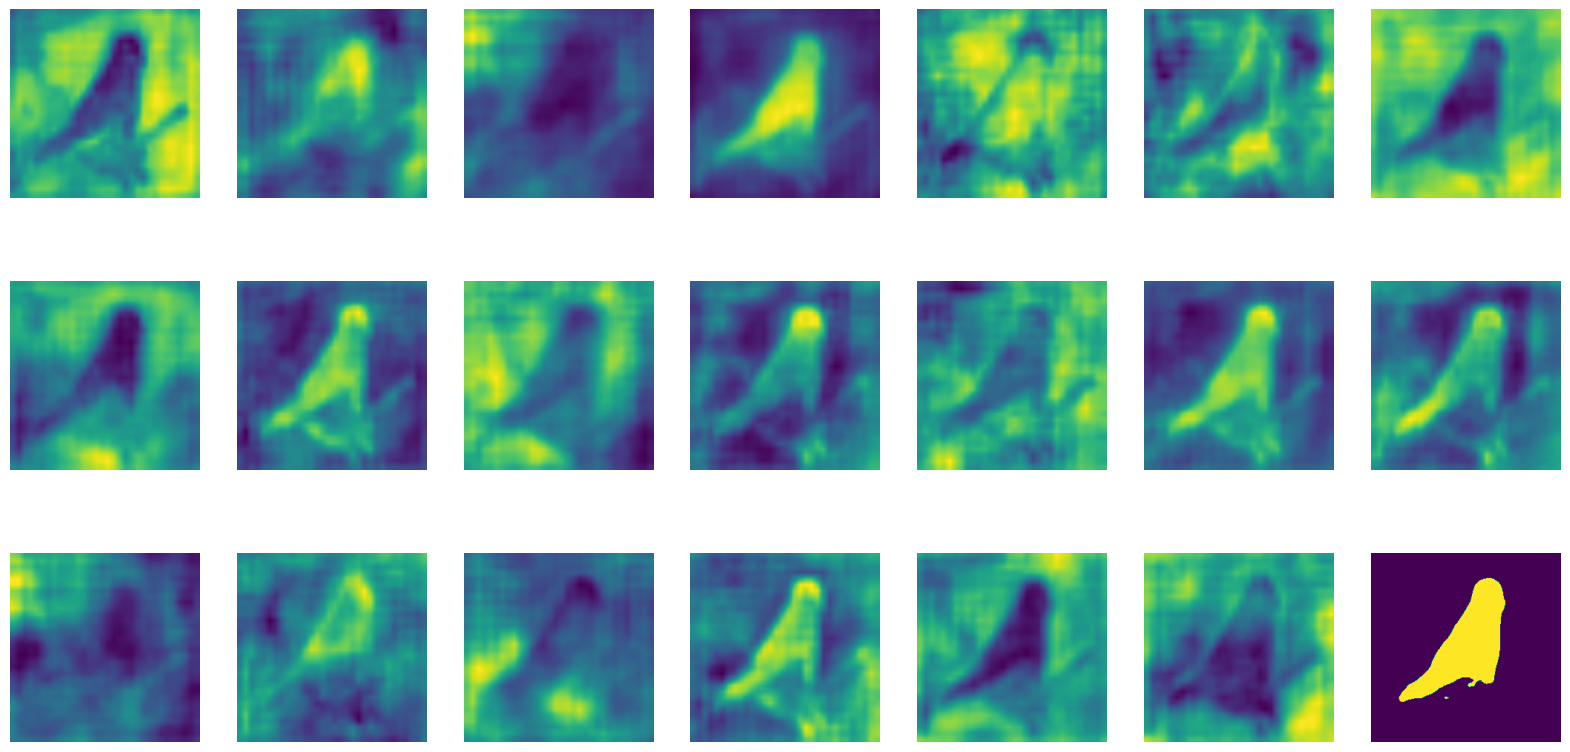

In [7]:
from IPython import get_ipython
from IPython.display import display
# %%
import time
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models
import matplotlib.pyplot as plt
from google.colab import files

# Check if GPU is available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Preprocessing the input image
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the FCN ResNet101 model
model = models.segmentation.fcn_resnet101(pretrained=True).to(device)
model.eval()

# Upload the image
uploaded = files.upload() # This will prompt you to upload the image file

# Load the image
# Get the filename from the uploaded dictionary
image_filename = list(uploaded.keys())[0]
input_image = Image.open(image_filename)  # Open the uploaded image using its filename
input_tensor = preprocess(input_image).unsqueeze(0).to(device)

# Perform segmentation with time tracking
start_time = time.time()

with torch.no_grad():
    output = model(input_tensor)['out'][0]

elapsed_time = time.time() - start_time
print(f"Segmentation completed in {elapsed_time:.2f} seconds.")

# Feature maps
feature_maps = output.cpu()

# Save feature maps as tiled image
fig, axes = plt.subplots(3, 7, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < 21:
        ax.imshow(feature_maps[i].numpy())
        ax.axis('off')
plt.savefig('feature_maps.png')

# Predicted segmentation
_, predicted_segmentation = torch.max(output, 0)
plt.imshow(predicted_segmentation.cpu())
plt.savefig('segmentation_result.png')

# Print progress for each feature map generation
total_maps = feature_maps.size(0)
for i, _ in enumerate(feature_maps):
    progress = (i + 1) / total_maps * 100
    print(f'Feature map generation progress: {progress:.2f}% [{i+1}/{total_maps}]')